# Data preparation exercise

- California Housing data file is used to review and clean the data
- Function to download from online path and save in folder
- Method to split new set of data into train and test (refer book Pg 87)


In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Download data from online path
This chunk is used to download dataset from the an online site, extract contents, and save into a newly created 
directory

In [24]:
import os
import tarfile
import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    

def load_housing_data(housing_path=HOUSING_PATH):
    #csv_path = os.path.join(housing_path, "housing.csv")
    csv_path = os.path.join("./", housing_path, "housing.csv")
    return pd.read_csv(csv_path)


In [150]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [142]:
# Use this to check the number of non null values, which are categorical variables, etc
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [143]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

<Figure size 1440x1080 with 0 Axes>

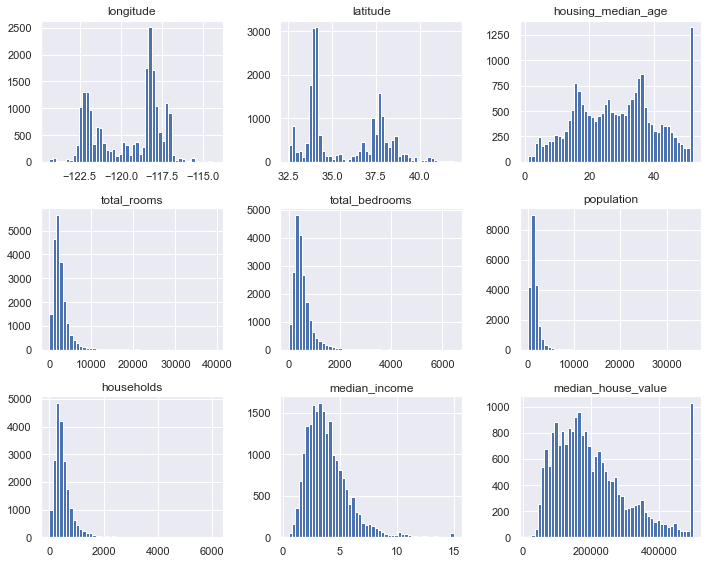

In [49]:
plt.figure(figsize = (20,15))
housing.hist(bins = 50, figsize = (10,8))
plt.tight_layout();

# Lot of the attributes have a long tail, so need to be modfied to get closer to normal distn

In [151]:
# train and test sets
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 22)

### Stratified splitting
Split the train and test data to get equal proportion of the income levels. Create 5 levels of income and use that for the stratified splitting.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html

<AxesSubplot:>

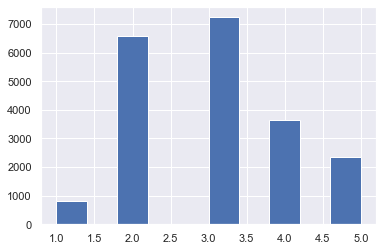

In [152]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

housing["income_cat"].hist()


In [153]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)

# split.split(x = df to be split, y = variable to split on)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [154]:
# Check the proportion of diff income levels in the test set and compare... it almost equal 
display(strat_test_set["income_cat"].value_counts() / len(strat_test_set))
display(housing["income_cat"].value_counts() / len(housing))

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [155]:
# remove the income_cat column
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [156]:
# make copy
housing = strat_train_set.copy()

### Plotting
- Maps
- Correlation heat map 
    - https://towardsdatascience.com/annotated-heatmaps-in-5-simple-steps-cc2a0660a27d
    - https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e

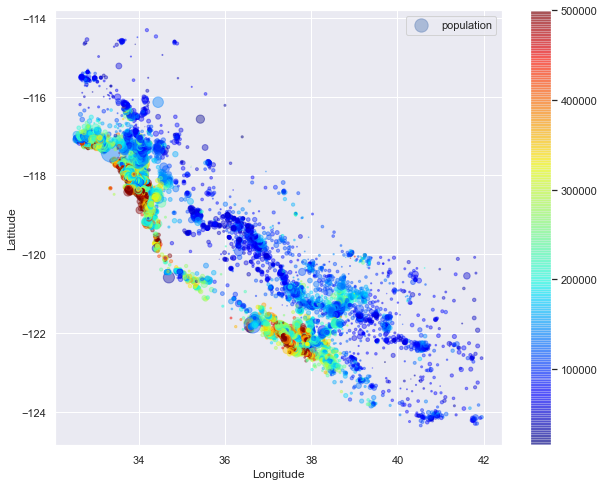

In [116]:
# plotting

plt.figure(figsize = (10,8))
plt.scatter(housing.latitude, housing.longitude, alpha = 0.4, s = housing.population/100,
           c = housing.median_house_value, cmap=plt.get_cmap("jet"), label = 'population')
plt.colorbar()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend();

In [121]:
housing.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


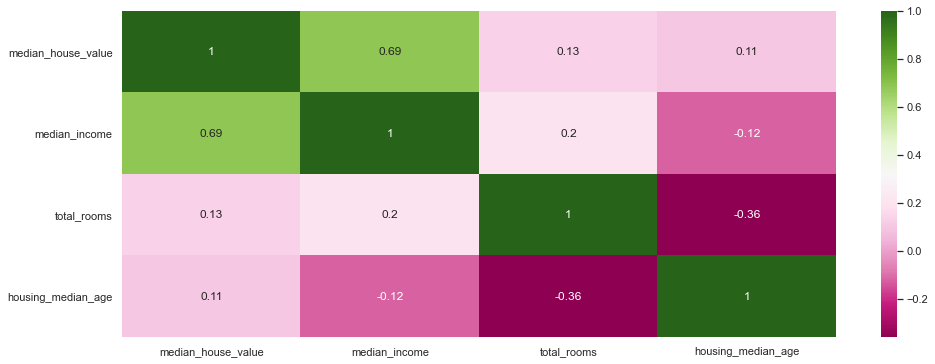

In [139]:
plt.figure(figsize=(16, 6))
sns.heatmap(housing[["median_house_value", "median_income", "total_rooms", "housing_median_age"]].corr(), 
            cmap="PiYG", annot = True);

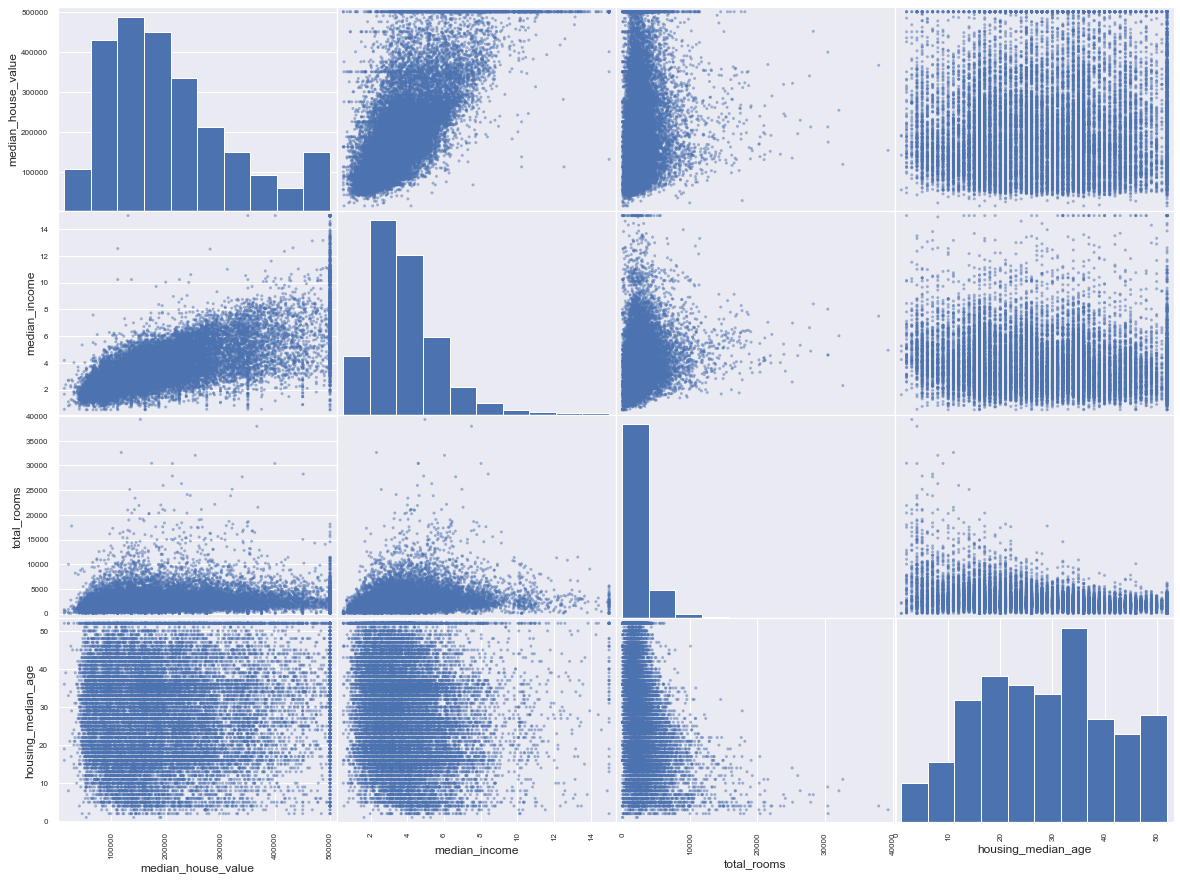

In [129]:
from pandas.plotting import scatter_matrix

scatter_matrix(housing[["median_house_value", "median_income", "total_rooms", "housing_median_age"]], 
                        figsize = (20,15));

In [157]:
# add new variables

housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

## Data Cleaning
- First create copy of the training set so that we can apply functions to this
- Ways to deal with missing data - drop rows, drop column, impute with values


In [259]:
# use only the predictors (x), leave out the (y) - median house value
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [196]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.9+ MB


## Impute NAs
- Feel like fillna with median or mean is more intuitive that imputer

In [172]:
# drop entire row with NAs in total_bedroom
housing.dropna(subset=["total_bedrooms"]) # option 1

# drop whole column
housing.drop("total_bedrooms", axis = 1) # option 2

# fill na with median values
#median = housing["total_bedrooms"].median() # option 3
#housing["total_bedrooms"].fillna(median, inplace=True)



In [260]:
from sklearn.impute import SimpleImputer

# need to make sure that imputer is applied only to numerical values
imputer = SimpleImputer(strategy = "median")

# Fit the imputer  on just one column
imputer.fit(housing.loc[:, housing.columns == 'total_bedrooms'])

# Tranform the column with the imputer --- this gives an array
housing["total_bedrooms"] = imputer.transform(housing.loc[:, housing.columns == 'total_bedrooms'])



## Text and Categorical features
- ```OneHotEncoder``` is used to convert categorical strings into a matrix of 1s and 0s for each of the category. The matrix is a sparse matrix which only stores the location of zeros.
- ```OrdinalEncoder``` gives sequential nos for the categories which is not good for modeling

In [261]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing[['ocean_proximity']])


In [262]:
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [264]:
# to convert into matrix 
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [265]:
# gives a list of the categories
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

## Custom Transformations